**Question :**

In driver_data.csv , you are given a dataset of delivery fleet driver data. For each driver we have two features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit. 

Run the K-Means algorithm on this dataset and find the optimal number of clusters. What insights can you gather from these clusters? 

Perform Agglomerative clustering on the same dataset with an appropriate number of clusters. Plot the dendrogram. 
Compare the results from your K-Means model and your Hierarchical clustering model using silhouette scores. Which model is superior? 



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [45]:
%matplotlib inline

In [3]:
data= pd.read_csv("driver_data.csv")
data.head()

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


In [4]:
data.shape

(4000, 2)

In [5]:
data.isnull().sum()  # No Missing values

Distance_Feature    0
Speeding_Feature    0
dtype: int64

In [6]:
data.duplicated().sum() # Checking for duplicates

163

In [7]:
data.drop_duplicates(inplace=True) # drop duplicates
data.shape

(3837, 2)

In [8]:
data.duplicated().sum() 

0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3837 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Distance_Feature  3837 non-null   float64
 1   Speeding_Feature  3837 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 89.9 KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance_Feature,3837.0,77.019567,54.232955,15.52,45.23,53.46,66.42,244.79
Speeding_Feature,3837.0,10.947094,13.943187,0.00,4.00,6.00,10.00,100.00


In [12]:
data.columns

Index(['Distance_Feature', 'Speeding_Feature'], dtype='object')

In [13]:
num_cols = ['Distance_Feature', 'Speeding_Feature']

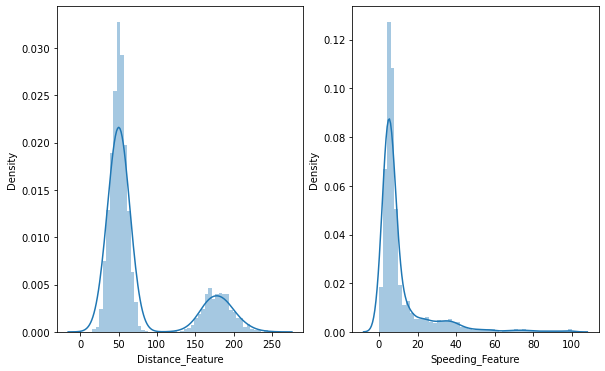

In [16]:
# Distplot for Numerical variables

plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(data[i])
    plot_num+=1
plt.show()

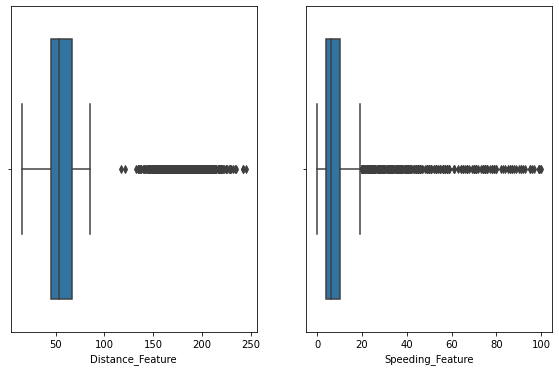

In [19]:
# Boxplot for outliers

plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plot_num+=1
plt.show()

## KMeans Model

In [98]:
df1 = data.copy()

<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

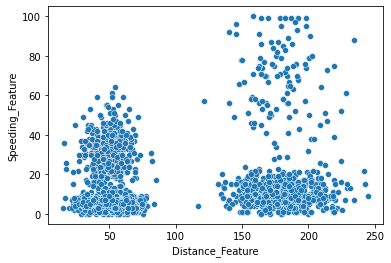

In [99]:
sns.scatterplot(x= 'Distance_Feature',y='Speeding_Feature',data=df1)

In [100]:
#Scaling
sc = StandardScaler()
df1_scaled = sc.fit_transform(df1)

In [80]:
from sklearn.cluster import KMeans

In [101]:
wcss = [] # For each value of k from 1 to 15 it calculates wcss
for i in range(1,16):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(df1_scaled)
    wcss.append(kmeans1.inertia_) # within cluster sum of squares
wcss

[7674.000000000006,
 3763.1201839320397,
 1693.6116023817135,
 710.3375241316569,
 594.692437713011,
 481.24884953416574,
 420.7277266798445,
 359.5431190905405,
 324.395081251217,
 293.6767991508672,
 263.38854425218653,
 237.23263791902912,
 217.8786869712216,
 203.89310442036154,
 191.7894807881812]

Text(0, 0.5, 'WCSS')

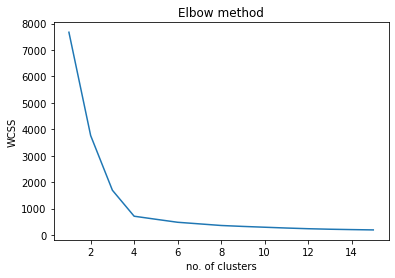

In [102]:
plt.plot(range(1,16),wcss)
plt.title('Elbow method')
plt.xlabel('no. of clusters')
plt.ylabel('WCSS')

## Result of elbow method: No: of clusters= 4

In [66]:
from sklearn.metrics import silhouette_score

In [103]:
for i in range(2,11):
    labels = KMeans(n_clusters=i).fit(df1_scaled).labels_
    print(f"Silhoutte score for k = {i} is {silhouette_score(df1_scaled,labels)}")

Silhoutte score for k = 2 is 0.7003500799401434
Silhoutte score for k = 3 is 0.7579467243203868
Silhoutte score for k = 4 is 0.780078705747875
Silhoutte score for k = 5 is 0.7294084894454242
Silhoutte score for k = 6 is 0.7290956938629217
Silhoutte score for k = 7 is 0.6561835075186127
Silhoutte score for k = 8 is 0.3603484967882672
Silhoutte score for k = 9 is 0.3609721318995439
Silhoutte score for k = 10 is 0.3565282490018132


## Result: Silhoutte score for k=4 is the highest, which is the same as given by elbow method

In [128]:
kmeans = KMeans(n_clusters=4, random_state=3)

In [129]:
kmeans.fit(df1_scaled)

KMeans(n_clusters=4, random_state=3)

In [130]:
kmeans.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [131]:
df1['labels'] = kmeans.labels_

In [132]:
df1.head()

,Distance_Feature,Speeding_Feature,labels
0,71.24,28,2
1,52.53,25,2
2,64.54,27,2
3,55.69,22,2
4,54.58,25,2


In [150]:
print("Count of label 0 :",df1[df1['labels']==0]['labels'].count())
print("Dist. Mean of label 0 :",df1[df1['labels']==0]['Distance_Feature'].mean())
print("Speed Mean of label 0 :",df1[df1['labels']==0]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")

print("Count of label 1 :",df1[df1['labels']==1]['labels'].count())
print("Dist. Mean of label 1 :",df1[df1['labels']==1]['Distance_Feature'].mean())
print("Speed Mean of label 1 :",df1[df1['labels']==1]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")

print("Count of label 2 :",df1[df1['labels']==2]['labels'].count())
print("Dist. Mean of label 2 :",df1[df1['labels']==2]['Distance_Feature'].mean())
print("Speed Mean of label 2 :",df1[df1['labels']==2]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")

print("Count of label 3 :",df1[df1['labels']==3]['labels'].count())
print("Dist. Mean of label 3 :",df1[df1['labels']==3]['Distance_Feature'].mean())
print("Speed Mean of label 3 :",df1[df1['labels']==3]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")


Count of label 0 : 2615
Dist. Mean of label 0 : 49.98130019120452
Speed Mean of label 0 : 5.204971319311664
-----------------------------------------------------------------------------
Count of label 1 : 692
Dist. Mean of label 1 : 180.42375722543358
Speed Mean of label 1 : 10.534682080924856
-----------------------------------------------------------------------------
Count of label 2 : 426
Dist. Mean of label 2 : 50.4105399061033
Speed Mean of label 2 : 32.37793427230047
-----------------------------------------------------------------------------
Count of label 3 : 104
Dist. Mean of label 3 : 177.83509615384614
Speed Mean of label 3 : 70.28846153846153
-----------------------------------------------------------------------------


<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

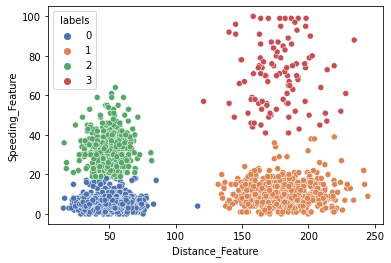

In [133]:
sns.scatterplot(x='Distance_Feature',y='Speeding_Feature',data=df1,hue='labels',palette='deep')

In [134]:
df1c= df1.copy()

In [135]:
def get_zprofiles(data,kmeans):
    data['Labels'] = kmeans.labels_
    profile= data.groupby('Labels').mean().subtract(data.drop('Labels', axis=1).mean(),axis=1)
    profile= profile.divide(data.drop('Labels', axis= 1).std(), axis=1)
    profile['Size']= data['Labels'].value_counts()
    return profile

In [182]:
df1_z= get_zprofiles(df1c,kmeans)
df1_z

,Distance_Feature,Speeding_Feature,labels,Size
Labels,,,,
0,-0.498558,-0.411823,-0.607218,2615
1,1.906667,-0.029578,0.648113,692
2,-0.490643,1.537012,1.903445,426
3,1.858935,4.255940,3.158776,104


In [183]:
df1_z.drop(columns= "labels", inplace=True)

In [184]:
df1_z

,Distance_Feature,Speeding_Feature,Size
Labels,,,
0,-0.498558,-0.411823,2615
1,1.906667,-0.029578,692
2,-0.490643,1.537012,426
3,1.858935,4.255940,104


<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

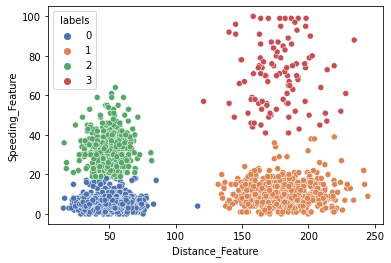

In [139]:
sns.scatterplot(x='Distance_Feature',y='Speeding_Feature',data=df1,hue='labels',palette='deep')

In [190]:
silhouette_score(df1_scaled,kmeans.labels_)  # for k=4

0.780078705747875

## Result KMeans:

- Silhouette_score = 0.78


- Cluster 0 with low distance, low speed is having maximum number of data points (2615)
- Cluster 0 might be short distance trips with high traffic (city area)


- Cluster 1 with high distance, low speed is having 2nd maximum number of data points (692)
- Cluster 1 might be long distance trips with high traffic


- Cluster 2 with low distance, high speed is having 426 data points 
- Cluster 2 might be short distance trips with low traffic


- Cluster 3 with high distance, high speed is having  104 data points 
- Cluster 3 might be long distance trips with low traffic

## Hierarchial (Agglomerative)

In [152]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [153]:
df2= data.copy()

In [156]:
#Scaling
sc = StandardScaler()
df2_scaled = sc.fit_transform(df2)

In [160]:
Z= linkage(df2_scaled, method= 'single')

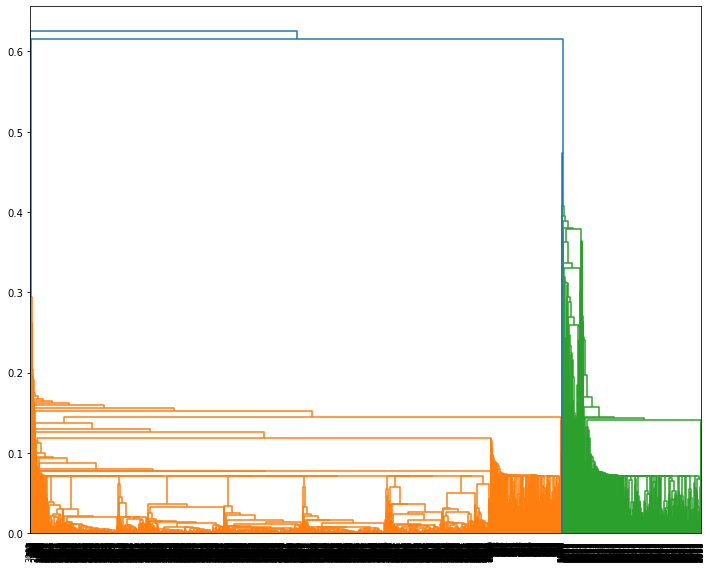

In [161]:
fig, ax= plt.subplots(figsize=(10,8))
ax= dendrogram(Z, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.show()

In [165]:
from sklearn.cluster import AgglomerativeClustering

In [167]:
for i in range(2,11):
    labels = AgglomerativeClustering(n_clusters=i).fit(df2_scaled).labels_
    print(f"Silhoutte score for k = {i} is {silhouette_score(df2_scaled,labels)}")

Silhoutte score for k = 2 is 0.631588806386496
Silhoutte score for k = 3 is 0.751129274977258
Silhoutte score for k = 4 is 0.7744761886348343
Silhoutte score for k = 5 is 0.7717010089322597
Silhoutte score for k = 6 is 0.7391949157827792
Silhoutte score for k = 7 is 0.6656449715131482
Silhoutte score for k = 8 is 0.3274052869622223
Silhoutte score for k = 9 is 0.32526442124869387
Silhoutte score for k = 10 is 0.32433852815185654


## Result: No. of clusters = 4

In [172]:
agg_cluster= AgglomerativeClustering(n_clusters=4)

In [173]:
labels2= agg_cluster.fit_predict(df2_scaled)

In [174]:
labels2

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [175]:
df2['labels2'] = labels2

In [176]:
df2.head()

,Distance_Feature,Speeding_Feature,labels2
0,71.24,28,1
1,52.53,25,1
2,64.54,27,1
3,55.69,22,1
4,54.58,25,1


<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

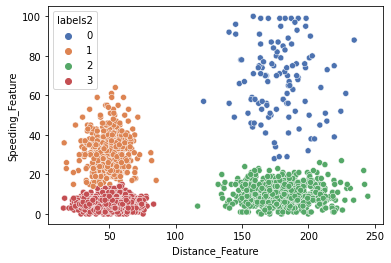

In [177]:
sns.scatterplot(x='Distance_Feature',y='Speeding_Feature',data=df2,hue='labels2',palette='deep')

In [179]:
print("Count of label 0 :",df2[df2['labels2']==0]['labels2'].count())
print("Dist. Mean of label 0 :",df2[df2['labels2']==0]['Distance_Feature'].mean())
print("Speed Mean of label 0 :",df2[df2['labels2']==0]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")

print("Count of label 1 :",df2[df2['labels2']==1]['labels2'].count())
print("Dist. Mean of label 1 :",df2[df2['labels2']==1]['Distance_Feature'].mean())
print("Speed Mean of label 1 :",df2[df2['labels2']==1]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")

print("Count of label 2 :",df2[df2['labels2']==2]['labels2'].count())
print("Dist. Mean of label 2 :",df2[df2['labels2']==2]['Distance_Feature'].mean())
print("Speed Mean of label 2 :",df2[df2['labels2']==2]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")

print("Count of label 3 :",df2[df2['labels2']==3]['labels2'].count())
print("Dist. Mean of label 3 :",df2[df2['labels2']==3]['Distance_Feature'].mean())
print("Speed Mean of label 3 :",df2[df2['labels2']==3]['Speeding_Feature'].mean())
print("-----------------------------------------------------------------------------")


Count of label 0 : 113
Dist. Mean of label 0 : 178.82150442477874
Speed Mean of label 0 : 67.3716814159292
-----------------------------------------------------------------------------
Count of label 1 : 447
Dist. Mean of label 1 : 50.269149888143204
Speed Mean of label 1 : 31.624161073825505
-----------------------------------------------------------------------------
Count of label 2 : 684
Dist. Mean of label 2 : 180.20152046783636
Speed Mean of label 2 : 10.220760233918128
-----------------------------------------------------------------------------
Count of label 3 : 2593
Dist. Mean of label 3 : 49.97651369070569
Speed Mean of label 3 : 5.1153104512148095
-----------------------------------------------------------------------------


In [180]:
df2c= df2.copy()

In [181]:
def get_zprofiles(data,kmeans):
    data['Labels'] = kmeans.labels_
    profile= data.groupby('Labels').mean().subtract(data.drop('Labels', axis=1).mean(),axis=1)
    profile= profile.divide(data.drop('Labels', axis= 1).std(), axis=1)
    profile['Size']= data['Labels'].value_counts()
    return profile

In [185]:
df2_z= get_zprofiles(df2c,agg_cluster)
df2_z

,Distance_Feature,Speeding_Feature,labels2,Size
Labels,,,,
0,1.877123,4.046750,-3.078079,113
1,-0.493250,1.482951,-1.847040,447
2,1.902569,-0.052092,-0.616001,684
3,-0.498646,-0.418253,0.615038,2593


In [186]:
df2_z.drop(columns= "labels2", inplace=True)

In [187]:
df2_z

,Distance_Feature,Speeding_Feature,Size
Labels,,,
0,1.877123,4.046750,113
1,-0.493250,1.482951,447
2,1.902569,-0.052092,684
3,-0.498646,-0.418253,2593


<AxesSubplot:xlabel='Distance_Feature', ylabel='Speeding_Feature'>

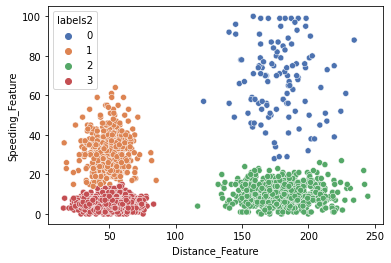

In [188]:
sns.scatterplot(x='Distance_Feature',y='Speeding_Feature',data=df2,hue='labels2',palette='deep')

In [191]:
silhouette_score(df2_scaled,labels2)  # for k=4

0.7744761886348343

## Result Hierarchical clustering (Agglomerative):

- Silhouette_score = 0.774


- Cluster 3 with low distance, low speed is having maximum number of data points (2593)
- Cluster 3 might be short distance trips with high traffic (city area)


- Cluster 2 with high distance, low speed is having 2nd maximum number of data points (684)
- Cluster 2 might be long distance trips with high traffic


- Cluster 1 with low distance, high speed is having 447 data points 
- Cluster 1 might be short distance trips with low traffic


- Cluster 0 with high distance, high speed is having  113 data points 
- Cluster 0 might be long distance trips with low traffic

## Comparison of models:

- Silhouette score for KMeans (0.78) is higher than that of Hierarchical clustering (Agglomerative) (0.774)

- Therefore, for this dataset, KMeans is superior